In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt150.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-5.607039e-13,-1.035936e-11,0.079485,-0.329381,0.638058,0.109683,4.483758,-4.792757e-10,-1.963810e-09,...,4.149016e-09,1.337705e-09,1.777128e-08,2.641428e-09,-0.973978,-0.226644,-0.541211,-0.840887,-0.894049,-0.447969
1,1,-1.264070e-04,1.922701e-05,0.078125,-0.327484,0.631525,0.110095,4.463323,-1.977136e-02,3.056883e-03,...,1.074625e-02,-4.382101e-02,2.018375e-02,-8.605970e-02,-0.969143,-0.246499,-0.541211,-0.840887,-0.896554,-0.442934
2,2,-4.605044e-04,7.355778e-05,0.076030,-0.322104,0.613615,0.111143,4.407098,-4.044882e-02,6.894617e-03,...,2.575142e-02,-9.480120e-02,4.313666e-02,-1.869054e-01,-0.953760,-0.300570,-0.541211,-0.840887,-0.903245,-0.429125
3,3,-1.051378e-03,2.000458e-04,0.073917,-0.314282,0.582339,0.115438,4.289241,-5.779718e-02,2.199616e-02,...,-5.560782e-02,-7.945120e-02,1.074971e-01,-4.441941e-01,-0.911801,-0.410633,-0.541211,-0.840887,-0.914549,-0.404476
4,4,-1.496877e-03,4.796254e-04,0.074368,-0.321993,0.566335,0.133200,4.105712,-3.025050e-02,3.277912e-02,...,-7.018639e-02,-5.448225e-02,1.117735e-01,-5.110605e-01,-0.821547,-0.570141,-0.541211,-0.840887,-0.921241,-0.388992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-4.879690e+00,-4.435414e+00,0.076841,-2.464506,0.108801,-0.929496,49.526684,-2.215365e-02,9.238261e-02,...,-7.590407e-02,-3.237866e-02,-2.164276e-02,-5.747561e-03,-0.673400,0.739278,-0.612764,0.790266,0.870741,0.491742
1996,1996,-4.879899e+00,-4.434607e+00,0.076834,-2.474722,0.111277,-0.930769,49.524487,-1.965877e-02,7.004599e-02,...,-5.927868e-02,-2.402115e-02,-1.848225e-02,-6.318612e-03,-0.675023,0.737797,-0.612764,0.790266,0.872698,0.488261
1997,1997,-4.880078e+00,-4.434020e+00,0.076811,-2.482169,0.113423,-0.931970,49.522144,-1.654395e-02,4.864585e-02,...,-4.382672e-02,-1.528082e-02,-1.561057e-02,-6.211786e-03,-0.676749,0.736214,-0.612764,0.790266,0.873965,0.485988
1998,1998,-4.880229e+00,-4.433645e+00,0.076782,-2.486899,0.115258,-0.933108,49.519672,-1.409473e-02,2.714531e-02,...,-2.791208e-02,-7.852706e-03,-1.237831e-02,-7.142700e-03,-0.678567,0.734538,-0.612764,0.790266,0.874554,0.484928


(2000, 45)

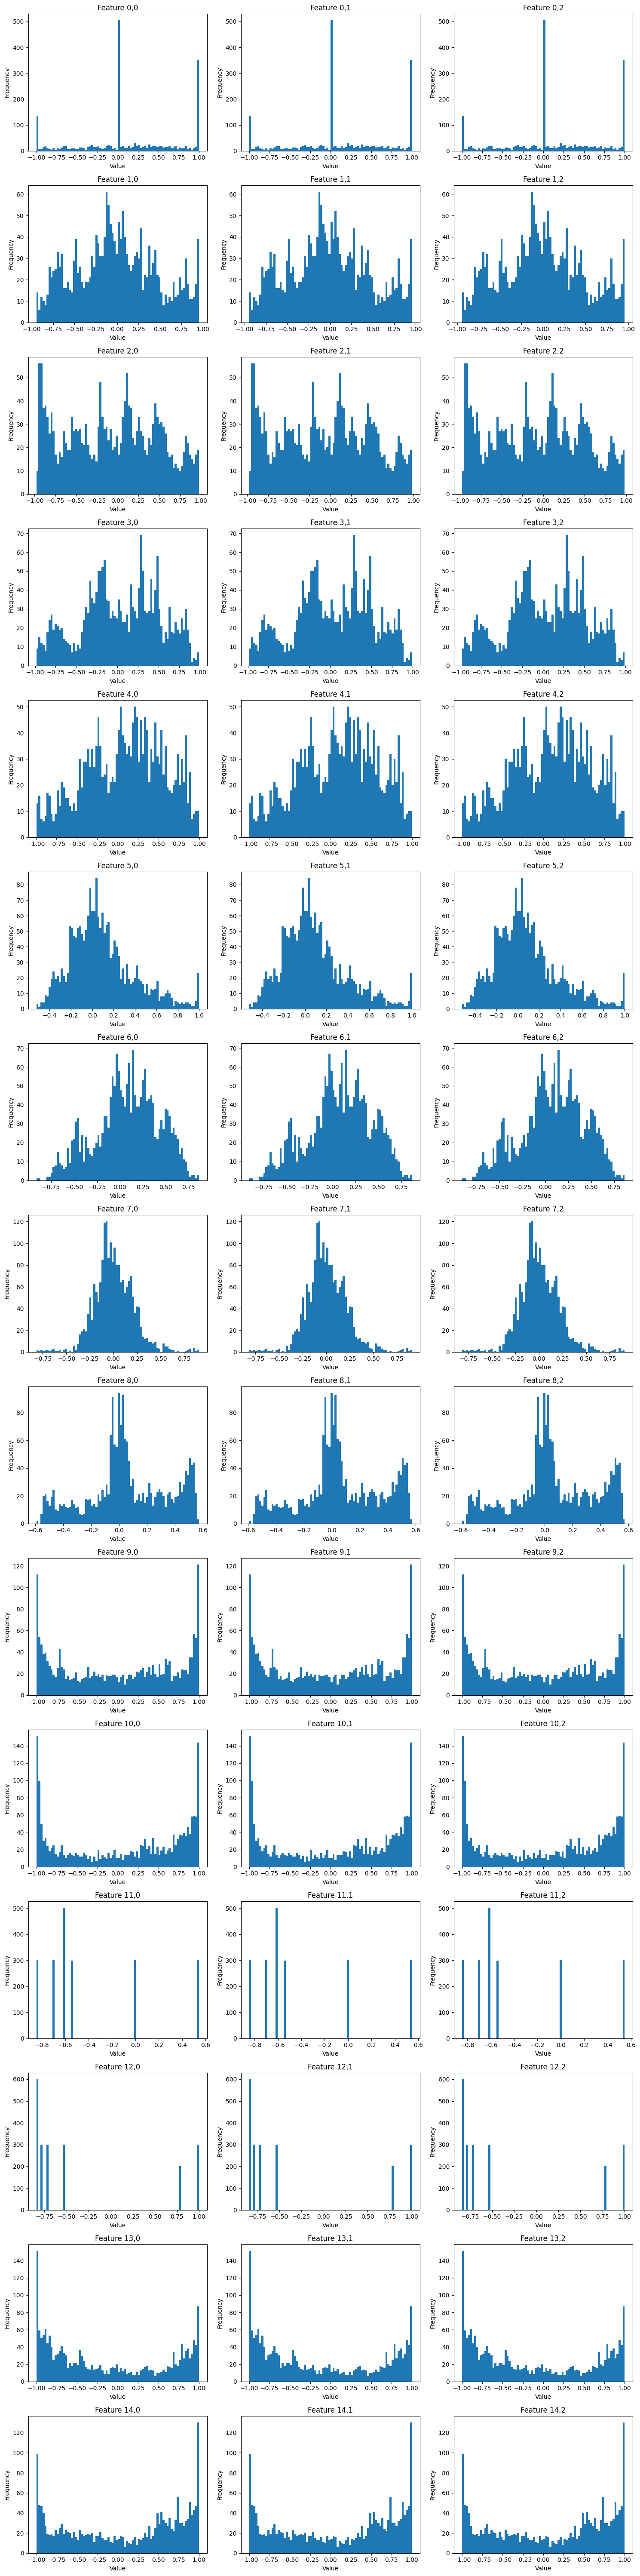

In [2]:

num_features = obs_array.shape[1]
num_rows = (num_features + 2) // 3  # Calculate rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(obs_array[:,i], bins=80)
    ax.set_title(f'Feature {i//3},{i%3}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

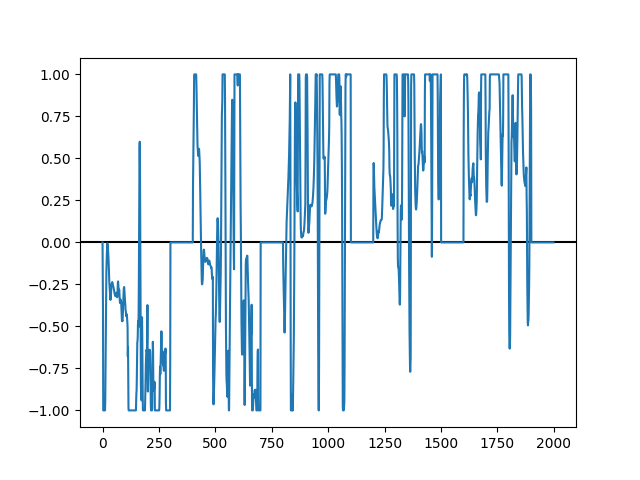

In [3]:
%matplotlib widget
plt.figure()
plt.axhline(0, color='black')
plt.plot(obs_array[:,0])

109.69245314565711


Text(0.5, 0, 'Time (s)')

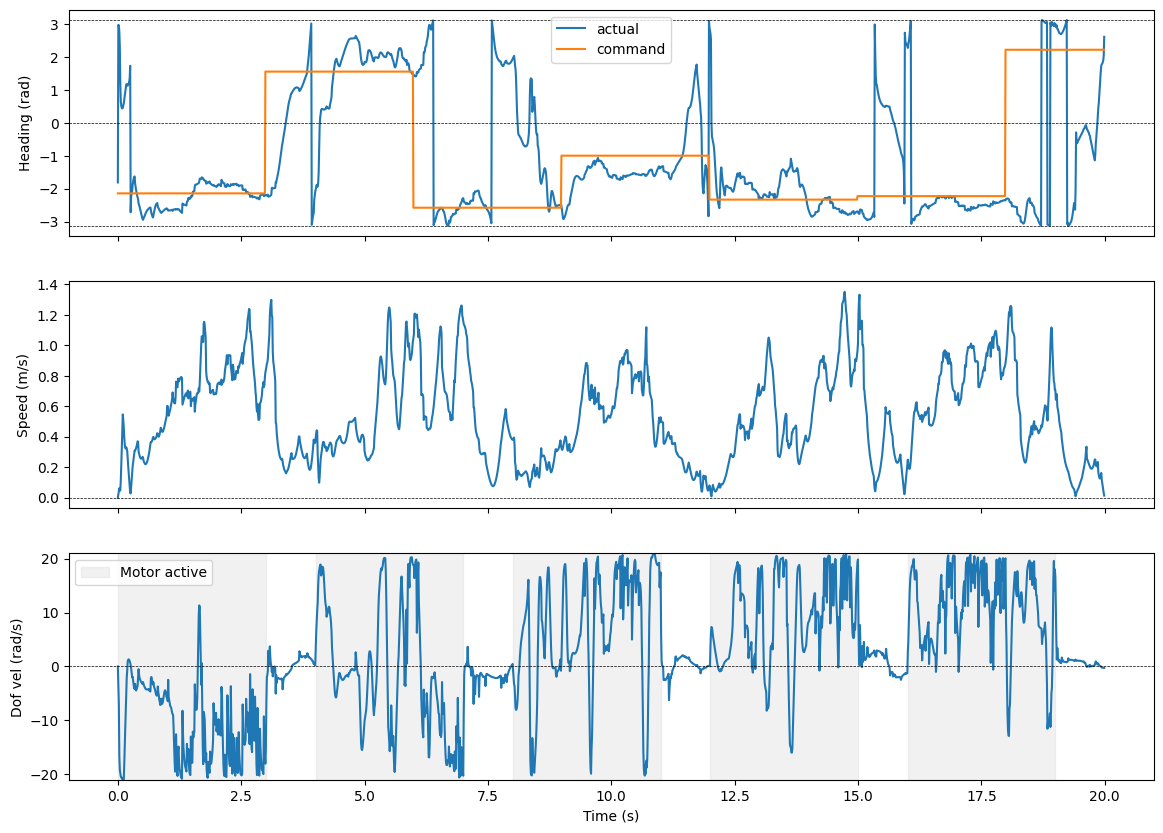

In [21]:
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# des_heading = des_heading + wrapped_diff*2*np.pi

heading_error_rms = np.sqrt(np.mean(np.square(heading - des_heading)))
print(heading_error_rms*180/np.pi)


fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*0.01, heading, label='actual')
axs[0].plot(np.arange(len(df))*0.01, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*0.01, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*0.01, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*0.01, df['action'])
# axs[2].plot(np.arange(len(df))*0.01, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*0.01, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

/tmp/ipykernel_1691084/1377988862.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(2.047025068718955, 2000)

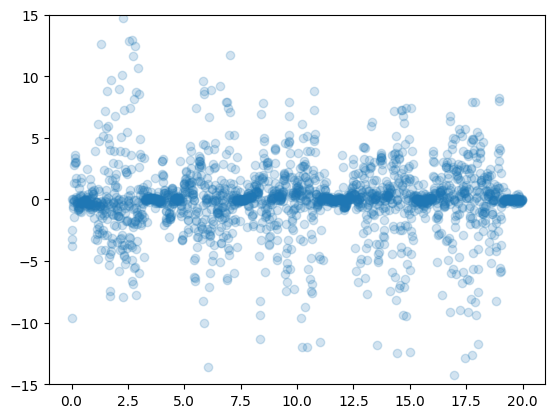

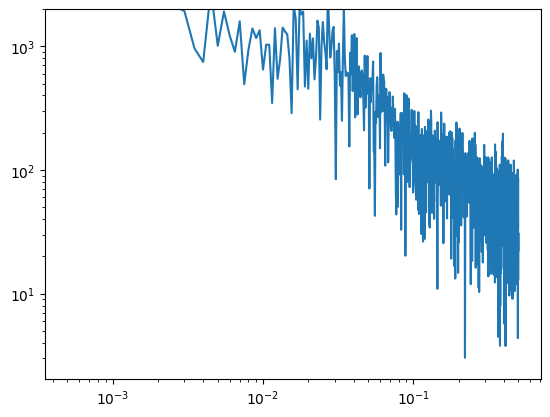

In [28]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*0.01, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)
